In [2]:
pip install "langchain[groq]" python-dotenv

  Using cached pydantic-2.11.7-py3-none-any.whl.metadata (67 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached typing_inspection-0.4.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.4 MB/s  0:00:00
Using cached pydantic-2.11.7-py3-none-any.whl (444 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 5.8 MB/s  0:00:00 eta 0:00:01
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
Using cached httpcore-1.0.9-py3-none-any.whl (78 kB)
Using cached h11-0.16.0-py3-none-any.whl (37 kB)
Using cached typing_inspection-0.4.1-

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv("GROQ_API_KEY")


In [7]:
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGSMITH_PROJECT"] = "smithkey"

In [10]:
from langchain.chat_models import init_chat_model

model = init_chat_model("qwen/qwen3-32b", model_provider="groq")

In [11]:
response = model.invoke("Explain me about neural networks")
response.content

'<think>\nOkay, so I need to explain neural networks. Hmm, neural networks are a type of machine learning model inspired by the human brain, right? Let me start by recalling what I know.\n\nFirst, they consist of layers of interconnected nodes, or neurons, which process information. There\'s an input layer, one or more hidden layers, and an output layer. Each neuron in a layer is connected to neurons in the next layer. These connections have weights that determine the strength of the signal passed along them.\n\nWait, how do they actually work? I think each neuron takes an input, which is a combination of the outputs from the previous layer multiplied by their respective weights. Then there\'s a bias term, and they apply an activation function to produce the neuron\'s output. The activation function introduces non-linearity, allowing the network to learn complex patterns.\n\nCommon activation functions include ReLU (Rectified Linear Unit), which is max(0, x), and sigmoid, which squashe

In [12]:
response = model.invoke("Who is the prime minister of India")
response.content

"<think>\nOkay, I need to figure out who the current Prime Minister of India is. Let me start by recalling some recent Indian politics. I remember that India is a parliamentary democracy, so the Prime Minister is the head of government. The country's Prime Minister is usually the leader of the majority party in the Lok Sabha, the lower house of Parliament.\n\nAs of my last update, the Prime Minister was Narendra Modi. He has been in office since 2014, right? His party, the Bharatiya Janata Party (BJP), has been quite influential. But I should check if there have been any changes since then. Let me think about any recent elections. The 2019 general election might have been a re-election for Modi, and the next general election is expected in 2024. So unless there was a snap election or a significant political shift, he should still be in power.\n\nI should also consider if there's been any interim or acting Prime Minister. For example, sometimes when a Prime Minister resigns or passes aw

In [13]:
from langchain_core.messages import HumanMessage, SystemMessage


model.invoke("Hello")

model.invoke([{"role": "user", "content": "Hello"}])

model.invoke([HumanMessage("Hello")])

AIMessage(content='<think>\nOkay, the user just said "Hello". I should respond in a friendly and welcoming manner. Let me make sure to acknowledge their greeting and offer assistance. Maybe something like, "Hello! How can I assist you today?" That\'s open-ended and invites them to ask questions or share what they need help with. I should keep it simple and approachable. No need for any markdown formatting here. Just a straightforward, warm response.\n</think>\n\nHello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 101, 'prompt_tokens': 9, 'total_tokens': 110, 'completion_time': 1.144355966, 'prompt_time': 0.006333582, 'queue_time': 0.043520488, 'total_time': 1.150689548}, 'model_name': 'qwen/qwen3-32b', 'system_fingerprint': 'fp_5cf921caa2', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--121e9fdb-a10c-4589-aa04-548dd61c51a8-0', usage_metadata={'input_tokens': 9, 'output_tokens': 101, 'total

In [14]:
model.invoke("Suggest me name of a place in one word to travel in India")

AIMessage(content='<think>\nOkay, the user is asking for a single-word name of a place to travel in India. Let me think about the different regions and their famous spots. First, I need to consider iconic destinations. Varanasi comes to mind because it\'s a holy city on the Ganges and known for its ghats. Then there\'s Kerala, which is a state with beautiful backwaters and beaches. Jaipur is famous for its forts and palaces, being the capital of Rajasthan. Goa is a popular beach destination with colonial architecture. Ladakh is a high-altitude area with stunning landscapes. Rishikesh is another spiritual place, known for yoga and the Ganges. Kerala again is good for houseboat tours. Darjeeling in West Bengal is famous for tea plantations. Udaipur is known as the Venice of the East with its lakes. Hampi in Karnataka is a UNESCO site with historical ruins. Which one is the most iconic and can be represented as a single word without confusion? Maybe "Ladakh" because it\'s unique and offer

In [15]:
from langchain_core.prompts import ChatPromptTemplate
travel_template = "Suggest me name of a place in one word to travel in {country}"
prompt_template = ChatPromptTemplate.from_messages([("system", travel_template), ("user", "{country}")])

In [16]:
prompt = prompt_template.invoke({"country": "India"})

In [17]:
model.invoke(prompt)

AIMessage(content='<think>\nOkay, the user is asking for a one-word name of a place to travel in India. Let me think. They might want a single word that\'s easy to remember and represents a popular destination.\n\nFirst, I should consider major cities known for tourism. Places like Jaipur, Delhi, Mumbai come to mind. But maybe they want something a bit more unique or less obvious? Let me check some other options.\n\nThen there are hill stations like Shimla or Manali. But "Shimla" is a single word. Wait, the user wants one word, so "Shimla" is good. But maybe they prefer a city known for historical sites? Like Varanasi? That\'s one word too. \n\nAlternatively, "Goa" is a state, but it\'s a single word and a major tourist spot. "Goa" is short and catchy. Also, "Udaipur" is a beautiful city in Rajasthan. \n\nI should also think about natural attractions. "Kerala" is a state, but maybe the user wants a city. Hmm. "Agra" is one word and home to the Taj Mahal. That\'s a classic choice. \n\nW

In [18]:
prompt_template = ChatPromptTemplate.from_template("Suggest me name of a place in one word to travel in {country} in month {month}")
prompt = prompt_template.invoke({"country": "India", "month": "December"})
print(prompt)

messages=[HumanMessage(content='Suggest me name of a place in one word to travel in India in month December', additional_kwargs={}, response_metadata={})]


In [19]:
response = model.invoke(prompt)
response.content

"<think>\nOkay, the user is asking for a one-word Indian travel destination for December. Let me start by thinking about the best places to visit in India during that month. December in India is winter, so the southern parts like Kerala or Tamil Nadu might be a bit warm, but perhaps the hill stations are more popular. Places like Shimla, Manali, or Mcleodganj come to mind. But the user wants a one-word name. Let me check the options.\n\nShimla is a good one-word name. It's a hill station in Himachal Pradesh, and December is when they get snow, so that's a big draw. Manali is another option, but maybe less known as a one-word. Mcleodganj is two words. Then there are the beaches, like Goa, but December is peak season there, but it's still a hot spot. However, Goa is one word. Alternatively, Rajasthan's desert, like Jaisalmer, but December is also good there for festivals. But maybe the user is looking for a more winter-specific destination. \n\nHimachal hill stations are a common choice.

In [20]:
from langchain_core.output_parsers import StrOutputParser

travel_destination_chain = prompt_template | model | StrOutputParser()

In [21]:
travel_destination_chain.invoke({"country": "India", "month": "December"})

'<think>\nOkay, the user is asking for a single-word name of a place in India to visit in December. Let me start by recalling where in India is good during December. December is winter, so maybe hill stations are a good option because the weather is pleasant there. Places like Shimla, Manali, or maybe McLeod Ganj come to mind. But the user wants just one word, so I need to pick the most popular one that\'s commonly recommended for December.\n\nShimla is a classic hill station, known for its colonial architecture and cold weather. Manali is also popular but maybe a bit more associated with skiing in January. McLeod Ganj is in Himachal Pradesh, close to Dalai Lama\'s temple, and it\'s beautiful in winter. Then there\'s Nainital, another hill station in Uttarakhand. But Shimla might be the most straightforward answer because it\'s well-known and often suggested for December. Alternatively, maybe Goa if someone wants a beach destination, but December is the start of the winter, so Goa\'s w

In [22]:
travel_itinerary_prompt = ChatPromptTemplate.from_template("Give me 3 days itinerary for the place {destination}")

In [23]:
composed_chain = {"destination" : travel_destination_chain} | travel_itinerary_prompt | model | StrOutputParser()

In [24]:
composed_chain.invoke({"country": "India", "month": "June"})

"<think>\nOkay, the user wants a 3-day itinerary for Ooty in June. Let me start by recalling the key attractions in Ooty. There are tea plantations, the government botanical garden, Doddabetta Peak, the Rose Garden, and maybe some wildlife like the Ooty Lake or the nearby Nilgiri Biosphere Reserve. \n\nFirst, I need to structure the days. Day 1 could be exploring the tea plantations and the botanical garden. Day 2 might focus on the Rose Garden and Doddabetta Peak. Day 3 could include a visit to the Ooty Lake and maybe a local market or wildlife spot.\n\nWait, but the user is traveling in June. The monsoon might start there, so I should mention weather advisories, like carrying an umbrella or checking the forecast. Also, some places might have slippery paths or closed due to rain, so suggest alternatives if possible.\n\nOn Day 1, starting with the Tea Plantations. The Government Tea Factory is a popular spot. Then the Botanical Garden. Maybe include a visit to the Ooty Lake in the even

In [25]:
model.invoke("who is the prime minister of India")

AIMessage(content="<think>\nOkay, so the user is asking who the Prime Minister of India is. Let me start by recalling the current political situation in India. As of my last update in July 2024, Narendra Modi has been serving as the Prime Minister since 2014. He was re-elected in 2019, and there were rumors about a potential third term in 2024, but I don't have specific information on the 2024 election results yet. \n\nFirst, I need to confirm if there were any elections in 2024. The Indian general elections are typically held every five years, so the next one after 2019 would be 2024. If elections took place in 2024, the outcome would determine the current Prime Minister. However, since my knowledge is cut off in July 2024, I might not have the latest election results. \n\nI should check if there's any information about the 2024 election. From what I know, the Indian National Congress and the BJP were the main competitors. The BJP, led by Modi, has been dominant in recent elections. I

In [26]:
model.invoke("Can you tell me more about him?")

AIMessage(content='<think>\nAlright, the user previously asked, "Can you tell me more about him?" This is a vague question that lacks specific context. I need to clarify who "him" refers to. Given the conversation history, the user might not have mentioned the specific person before, or perhaps they mentioned someone in a previous interaction that I don\'t have access to. Since each session is independent, I should prompt the user to provide more details.\n\nTo respond appropriately, I should ask the user to clarify which person they are referring to. This ensures accurate and helpful information. I\'ll phrase it in a friendly manner to encourage them to specify the name or context related to the individual they\'re interested in.\n</think>\n\nOf course! Could you please clarify who "him" refers to? Let me know the name or context of the person you\'re interested in, and I’ll provide detailed information! 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens':

In [27]:
model.invoke("suggest me a topic to study")

AIMessage(content="<think>\nOkay, the user asked for a study topic suggestion. Let me think about how to approach this. First, I need to consider their possible interests and academic level. Since they didn't specify, maybe I should offer a range of topics across different fields.\n\nLet me start by categorizing potential areas. Science and technology are always popular. Maybe AI ethics? That's timely and has real-world implications. Renewable energy is another hot topic, especially with climate change. Quantum computing is cutting-edge but might be too advanced for some. \n\nWhat about social sciences? Climate change's social impacts could be interesting. Psychology topics like the psychology of decision-making might appeal to others. Economics has topics like the gig economy or inequality. \n\nFor creative fields, maybe digital art or storytelling. Technical writing is also a skill that's in demand. If they're into health, studying mental health stigma or nutrition trends. \n\nI shou

In [28]:
model.invoke("can you tell me more about the topic?")

AIMessage(content='<think>\nOkay, the user just asked, "can you tell me more about the topic?" but there\'s no previous context provided. I need to figure out what topic they\'re referring to. Since the conversation just started, maybe they mentioned a topic in a previous message that I missed? Wait, looking at the history, the user only sent that one message. Hmm.\n\nMaybe the user is testing the system or wants a general overview. But the initial message is too vague. Without knowing the specific topic, I can\'t provide relevant information. The user might be referring to the previous question they had, but there\'s nothing to reference. \n\nI should respond by asking them to clarify the topic they\'re interested in. Need to prompt them to provide more details so I can assist better. Make sure the response is polite and helpful. Let me check if there\'s any other context I might have missed. No, the conversation just started. Alright, the best approach is to request the specific topi

In [29]:
pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [langgraph]
Note: you may need to restart the kernel to use updated packages.


In [6]:
from langgraph.graph import StateGraph
from typing import TypedDict

In [8]:
class MyState(TypedDict):
    x: int
    y: int
    result: int

In [11]:
# 2. Define your node functions
def func1(state: MyState) -> dict:
    x, y = state["x"], state["y"]
    return {"result": x + y}

def func2(state: MyState) -> dict:
    return {"result": 2 * state["result"]}

# 3. Build the graph
workflow = StateGraph(state_schema=MyState)

workflow.add_node("node_1", func1)
workflow.add_node("node_2", func2)

workflow.add_edge("node_1", "node_2")

workflow.set_entry_point("node_1")
workflow.set_finish_point("node_2")

# 4. Compile it
app = workflow.compile()

# 5. Run it
output = app.invoke({"x": 10, "y": 5})
print(output)   

{'x': 10, 'y': 5, 'result': 30}


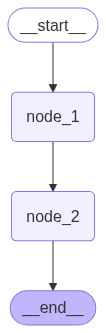

In [12]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass